# Predicting Industrial Machine Downtime: Level 2


# executive summary 

1- Exploring the data with som EDA

2- See the correlations between variables 

3- Explore Patterns in time

4- final recommendations

## 💪 Competition challenge

Create a report that covers the following:
1. Explore correlations between the various operational data in the dataset. 
2. Do you see a pattern in machine downtime over time?
3. Which factors (visually) seem to be connected to machine downtime?

# Explore the data

In [35]:
import pandas as pd
downtime = pd.read_csv('data/machine_downtime.csv')
downtime.head()

Date            Machine_ID Assembly_Line_No  Hydraulic_Pressure(bar)  \
0  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                    71.04   
1  31-12-2021  Makino-L1-Unit1-2013     Shopfloor-L1                   125.33   
2  31-12-2021  Makino-L3-Unit1-2015     Shopfloor-L3                    71.12   
3  31-05-2022  Makino-L2-Unit1-2015     Shopfloor-L2                   139.34   
4  31-03-2022  Makino-L1-Unit1-2013     Shopfloor-L1                    60.51   

   Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
0               6.933725                  6.284965                 25.6   
1               4.936892                  6.196733                 35.3   
2               6.839413                  6.655448                 13.1   
3               4.574382                  6.560394                 24.4   
4               6.893182                  6.141238                  4.1   

   Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  Spindle_Vibration  \
0                       46.0                         33.4              1.291   
1                       47.4                         34.6              1.382   
2                       40.7                         33.0              1.319   
3                       44.2                         40.6              0.618   
4                       47.3                         31.4              0.983   

   Tool_Vibration  Spindle_Speed(RPM)  Voltage(volts)  Torque(Nm)  \
0          26.492             25892.0           335.0   24.055326   
1          25.274             19856.0           368.0   14.202890   
2          30.608             19851.0           325.0   24.049267   
3          30.791             18461.0           360.0   25.860029   
4          25.516             26526.0           354.0   25.515874   

   Cutting(kN)         Downtime  
0         3.58  Machine_Failure  
1         2.68  Machine_Failure  
2         3.55  Machine_Failure  
3         3.55  Machine_Failure  
4         3.55  Machine_Failure

checking types and see Nans

In [36]:
downtime.dtypes
downtime.Date = pd.to_datetime(downtime.Date, errors='coerce')

downtime.isna().sum() / len(downtime)
downtime.dropna(inplace=True) # because most Nans < 5% of data

C:\Users\El-Wattaneya\AppData\Local\Temp\ipykernel_7624\3667906498.py:2: UserWarning: Parsing dates in %d-%m-%Y format when dayfirst=False (the default) was specified. Pass `dayfirst=True` or specify a format to silence this warning.
  downtime.Date = pd.to_datetime(downtime.Date, errors='coerce')


checking distribution of failuer machines

In [37]:
downtime.Downtime.value_counts()

Downtime
Machine_Failure       1231
No_Machine_Failure    1150
Name: count, dtype: int64

# EDA

In [38]:
statistics = downtime.describe()
statistics

Date  Hydraulic_Pressure(bar)  \
count                           2381              2381.000000   
mean   2022-03-13 12:00:54.430911488               101.184167   
min              2021-11-24 00:00:00               -14.326454   
25%              2022-02-22 00:00:00                76.220000   
50%              2022-03-14 00:00:00                96.165147   
75%              2022-04-02 00:00:00               126.302016   
max              2022-06-19 00:00:00               191.000000   
std                              NaN                30.323683   

       Coolant_Pressure(bar)  Air_System_Pressure(bar)  Coolant_Temperature  \
count            2381.000000               2381.000000          2381.000000   
mean                4.955532                  6.499094            18.518774   
min                 0.325000                  5.063480             4.100000   
25%                 4.470511                  6.218482            10.500000   
50%                 4.940503                  6.505191            21.100000   
75%                 5.526438                  6.780411            25.600000   
max                11.350000                  7.973992            36.500000   
std                 1.000772                  0.406355             8.360034   

       Hydraulic_Oil_Temperature  Spindle_Bearing_Temperature  \
count                2381.000000                  2381.000000   
mean                   47.616422                    35.064763   
min                    35.200000                    22.600000   
25%                    45.100000                    32.500000   
50%                    47.700000                    35.100000   
75%                    50.100000                    37.600000   
max                    61.400000                    49.500000   
std                     3.757603                     3.764735   

       Spindle_Vibration  Tool_Vibration  Spindle_Speed(RPM)  Voltage(volts)  \
count        2381.000000     2381.000000         2381.000000     2381.000000   
mean            1.007646       25.415098        20271.568249      349.101638   
min            -0.461000        3.469000            0.000000      202.000000   
25%             0.777000       21.056000        17919.000000      319.000000   
50%             1.007000       25.437000        20126.000000      349.000000   
75%             1.233000       29.826000        22492.000000      380.000000   
max             2.000000       45.726000        27957.000000      479.000000   
std             0.341260        6.455127         3853.673196       45.277313   

        Torque(Nm)  Cutting(kN)  
count  2381.000000  2381.000000  
mean     25.196960     2.785586  
min       0.000000     1.800000  
25%      21.653830     2.270000  
50%      24.633746     2.770000  
75%      30.514008     3.270000  
max      55.552400     3.930000  
std       6.151921     0.615749

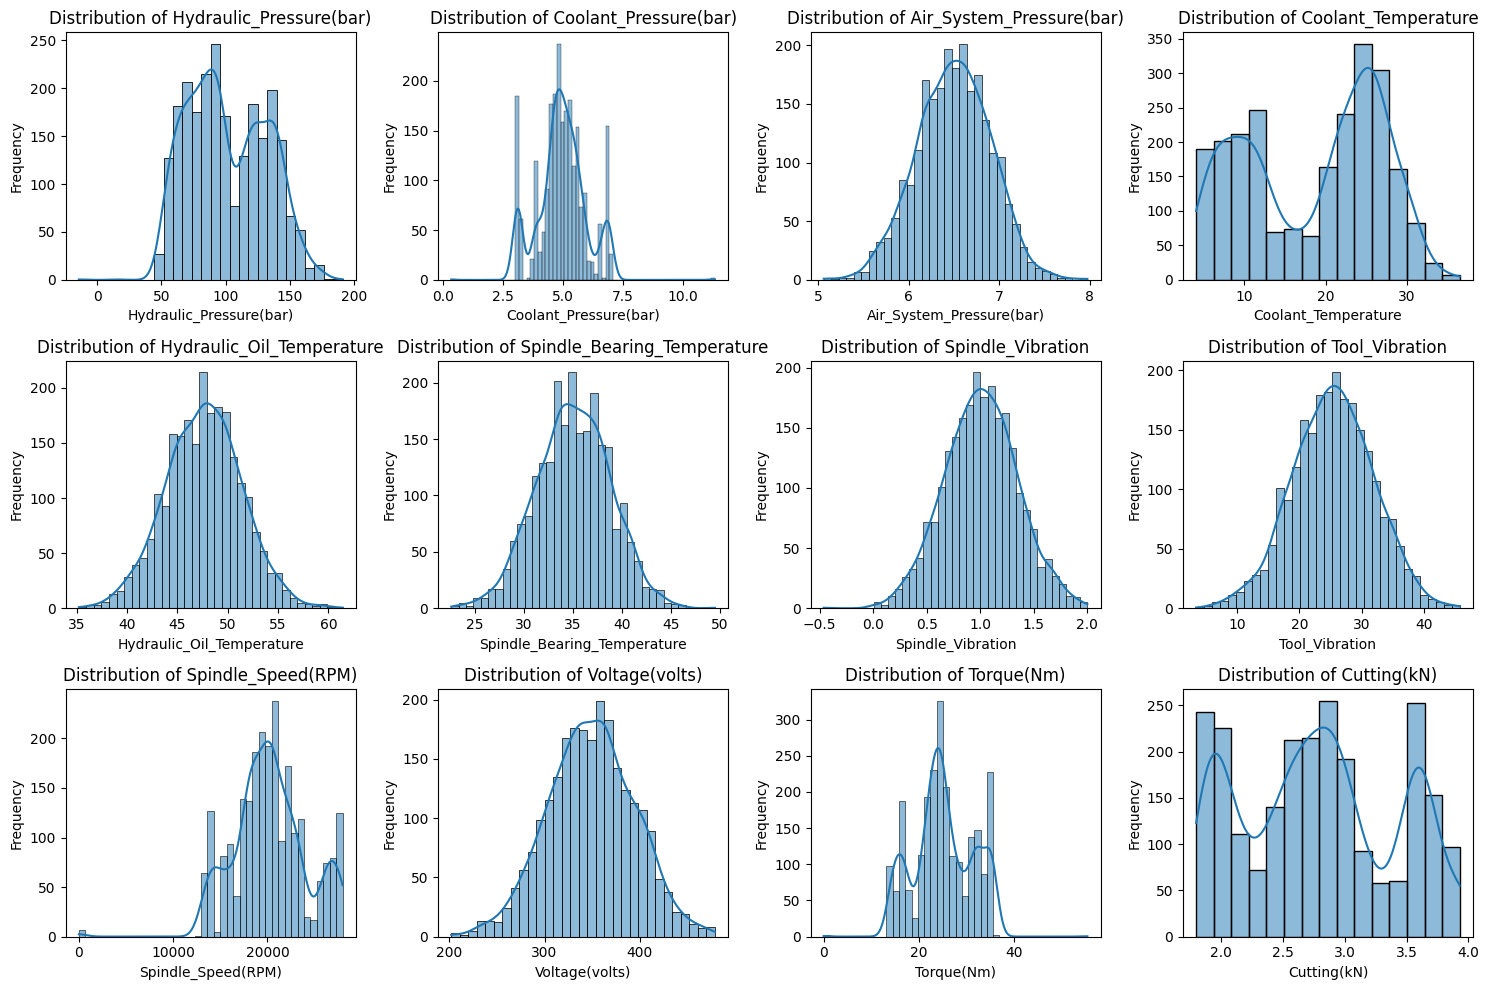

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns

# List of numeric columns
numeric_cols = downtime.select_dtypes(include=['float64', 'int64']).columns

# Create a grid of subplots
fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(15, 10))  # 3 rows, 4 columns

# Flatten axes array for easier iteration
axes = axes.flatten()

# Loop through each numeric column and plot its distribution
for i, col in enumerate(numeric_cols):
    sns.histplot(downtime[col], kde=True, ax=axes[i])  # Add KDE for smooth distribution
    axes[i].set_title(f'Distribution of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Frequency')

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()

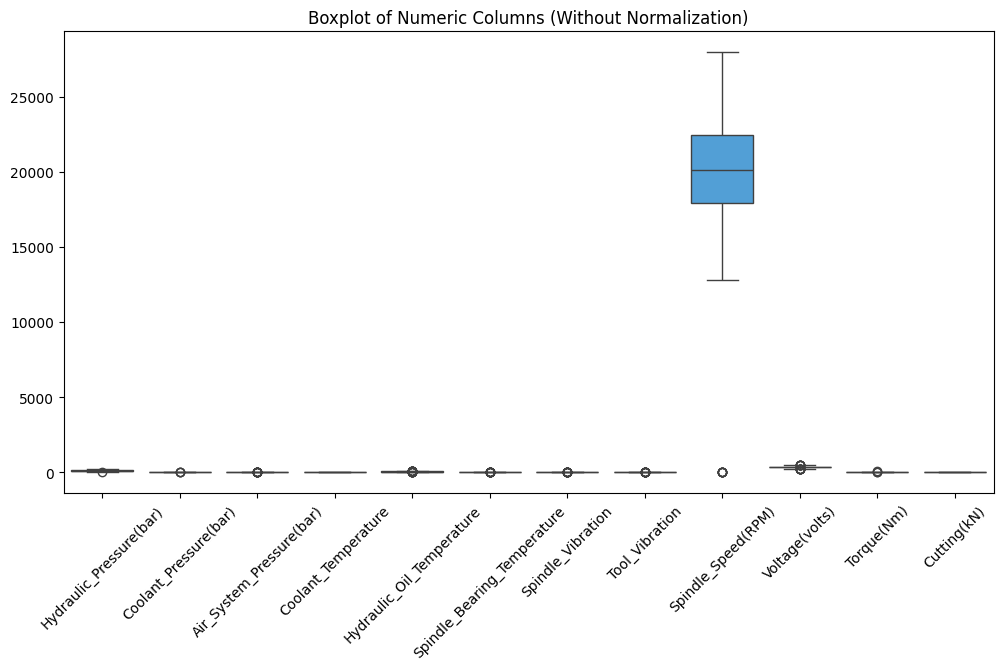

In [40]:
# Select numerical columns
numerical_columns = list(downtime.select_dtypes(include='number').columns) 

# Create a boxplot for all numeric columns without scaling
plt.figure(figsize=(12, 6))
sns.boxplot(data=downtime[numerical_columns])
plt.xticks(ticks=range(len(numerical_columns)), labels=numerical_columns, rotation=45)  
plt.title('Boxplot of Numeric Columns (Without Normalization)')
plt.show()


- > doing normalization for better visualization

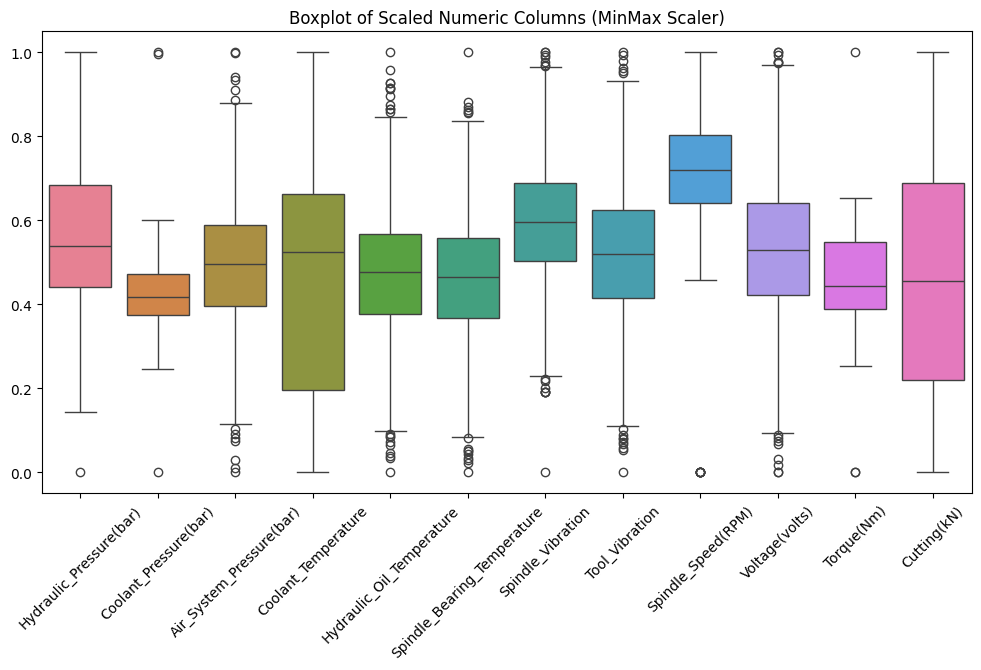

In [41]:
from sklearn.preprocessing import MinMaxScaler

# Scaling numerical features
scaler = MinMaxScaler()
numerical_columns = downtime.select_dtypes(include='number').columns  
downtime_scaled = pd.DataFrame(scaler.fit_transform(downtime[numerical_columns]), columns=numerical_columns)

# Create a boxplot for all numeric columns
plt.figure(figsize=(12, 6))
sns.boxplot(data=downtime_scaled)
plt.xticks(ticks=range(len(numerical_columns)), labels=numerical_columns, rotation=45)  
plt.title('Boxplot of Scaled Numeric Columns (MinMax Scaler)')
plt.show()


## 1. Explore correlations between the various operational data in the dataset. ⭐


# Lets see the correlations between the columns to see if there is a pattern

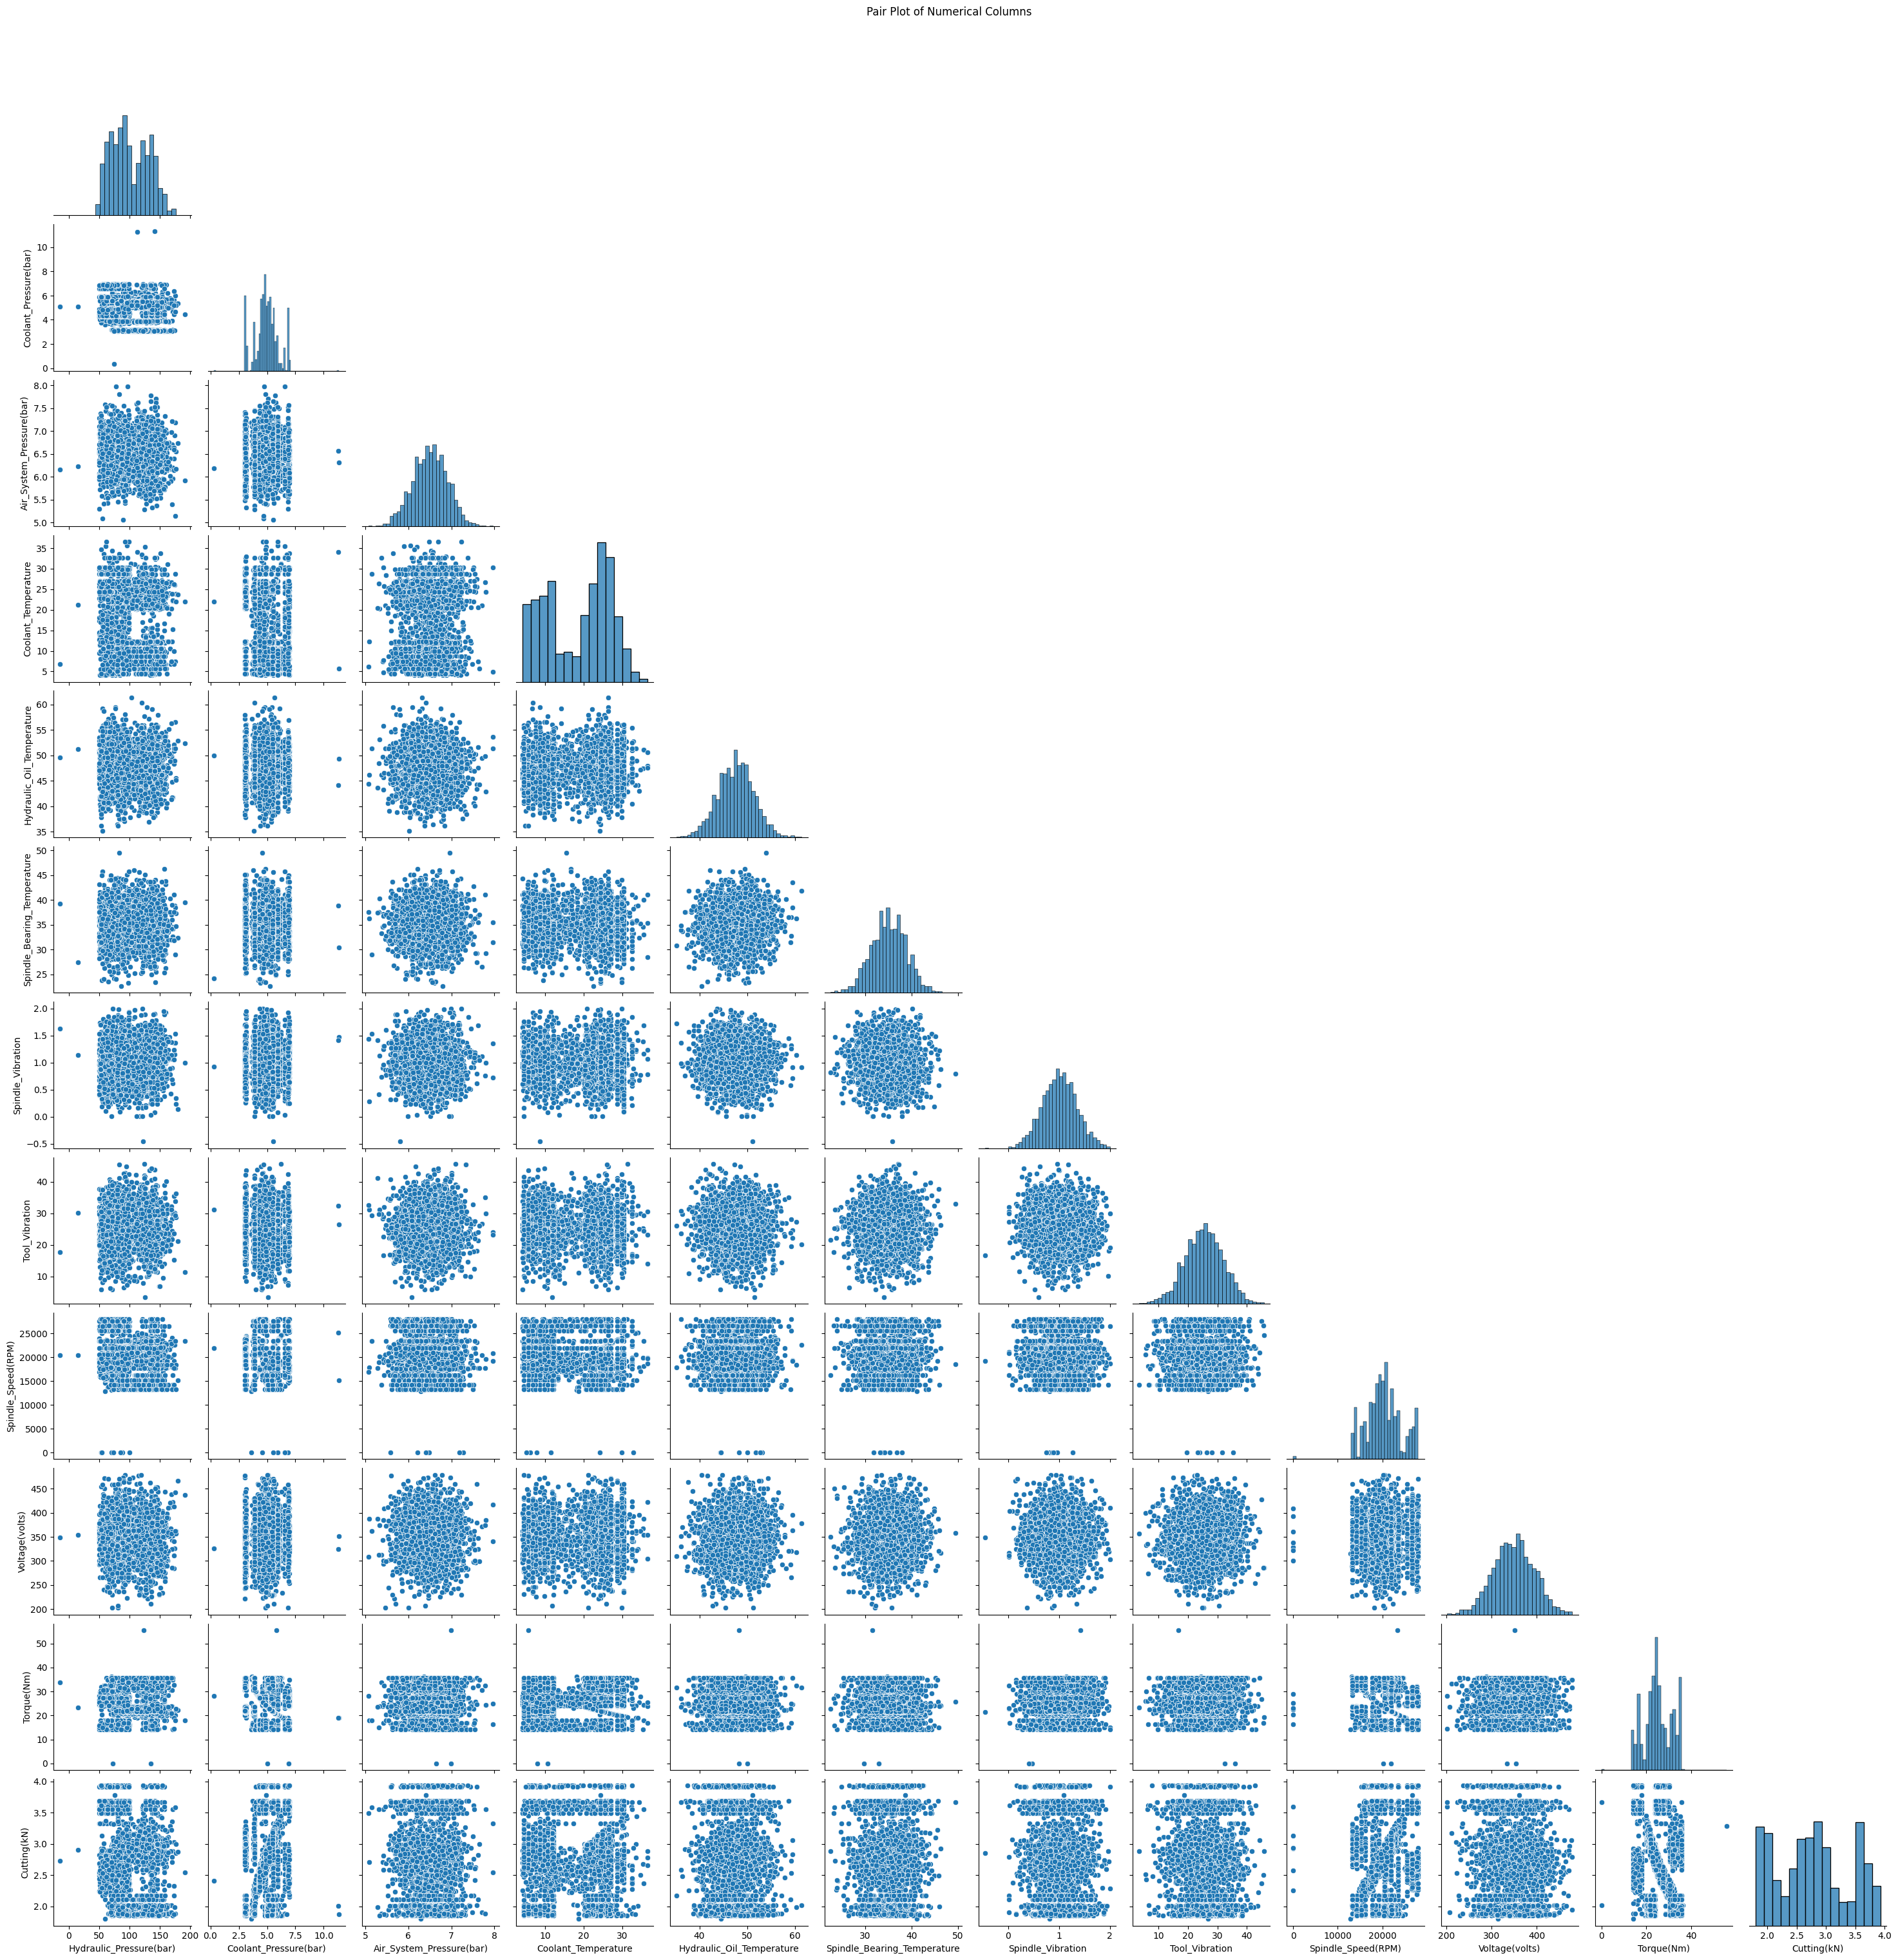

In [42]:
sns.pairplot(downtime, diag_kind='hist', corner=True)  
plt.suptitle('Pair Plot of Numerical Columns', y=1.02) 
plt.show()

- >No clear pattern between variables ✍

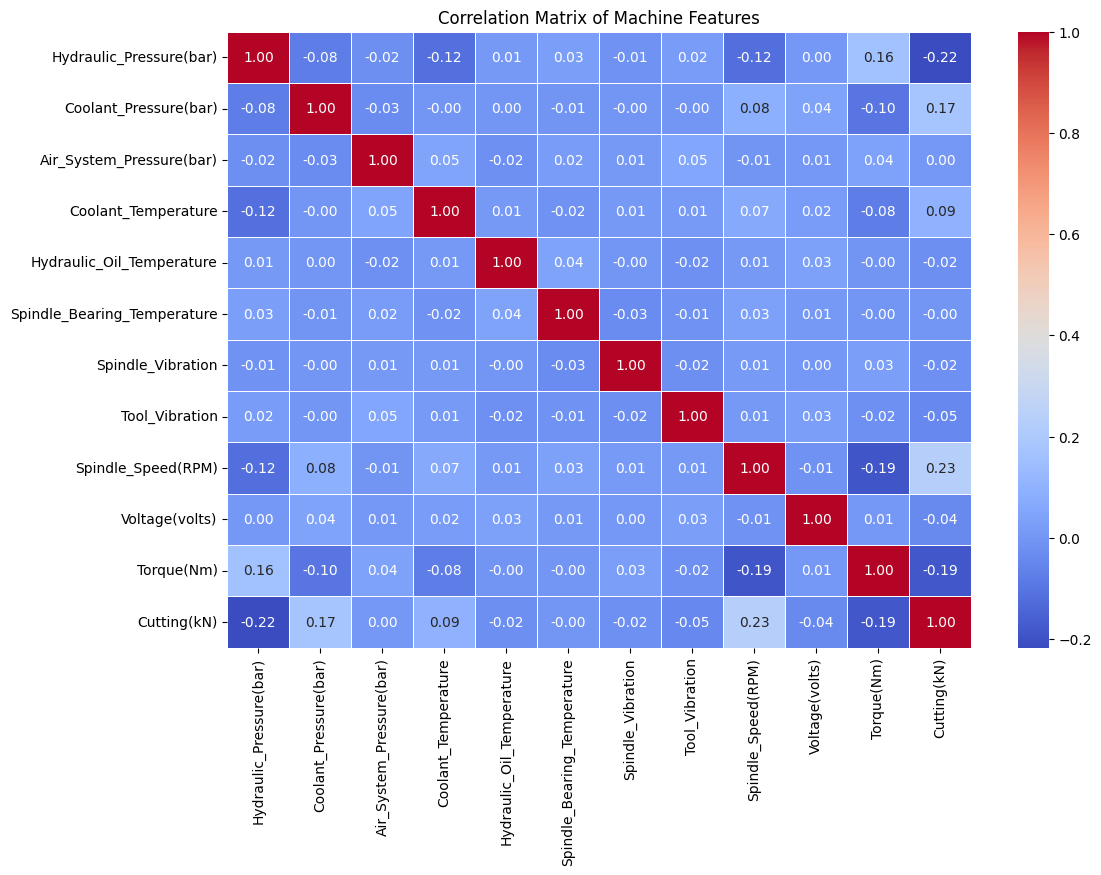

In [43]:
# Calculate the correlation matrix between numerical columns
numerical_columns = list(downtime.select_dtypes(include='number'))
correlation_matrix = downtime[numerical_columns].corr()

# Visualize the correlation matrix using a heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Matrix of Machine Features')
plt.show()

- > The correlation heatmap reveals weak relationships between most features, suggesting low multicollinearity. This indicates that the features are relatively independent ✍

- >The strongest correlations occur between Cutting (KN), Torque (Nm), and Spindle Speed (RPM), but they are still weak ✍

## 2. Do you see a pattern in machine downtime over time? ⭐ ⭐


# Pattern in machine downtime over time

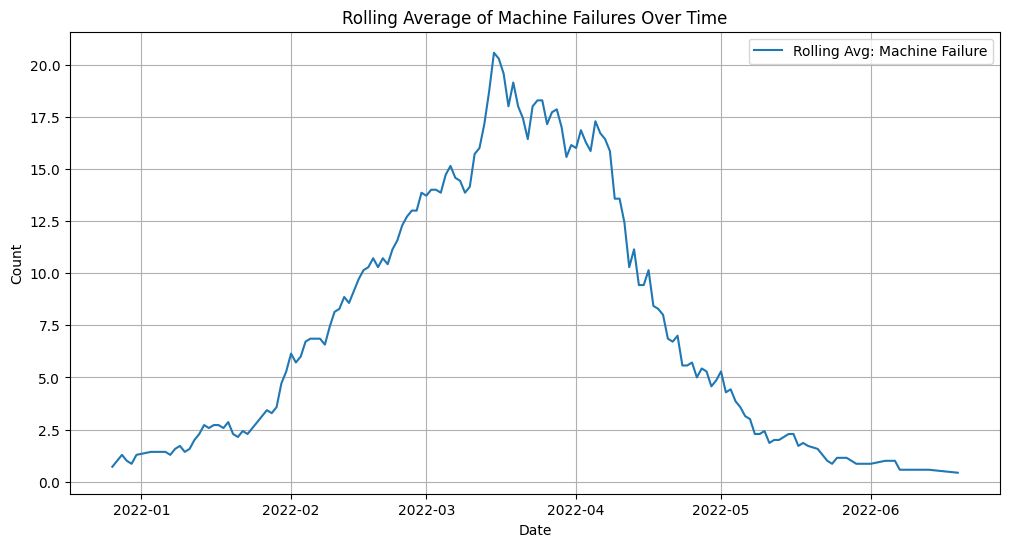

In [44]:
# Count downtime occurrences by date
downtime_summary = downtime.groupby(['Date', 'Downtime']).size().unstack(fill_value=0)

# Calculate rolling averages for failure counts
downtime_summary['Machine_Failure_Rolling'] = downtime_summary['Machine_Failure'].rolling(window=7).mean()

# Plot rolling averages
plt.figure(figsize=(12, 6))
plt.plot(downtime_summary.index, downtime_summary['Machine_Failure_Rolling'], label='Rolling Avg: Machine Failure')
plt.title('Rolling Average of Machine Failures Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.legend()
plt.grid()
plt.show()


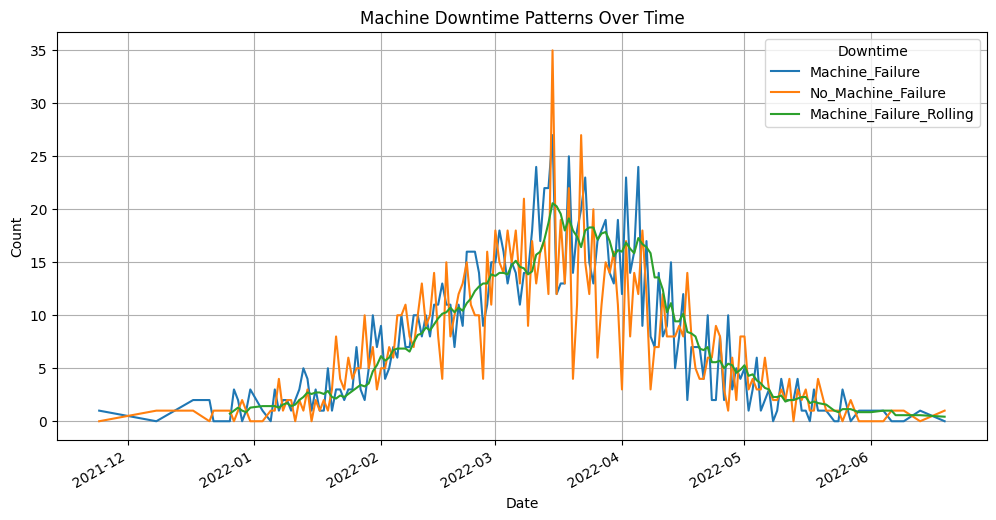

In [45]:
# Plot trends over time
downtime_summary.plot(figsize=(12, 6))
plt.title('Machine Downtime Patterns Over Time')
plt.xlabel('Date')
plt.ylabel('Count')
plt.grid()
plt.legend(title='Downtime')
plt.show()

- > It seems like the number of failures and not failures increased from feb 2022 to half of mar 2022 then return to decrease again 
(this could be due to increase of the overall number of machines and something happened made it decrease again) ✍

# Let's see if there is a pattern in specific days , weeks or monthes

For Failures by Day (Grouped by Day of the Week):



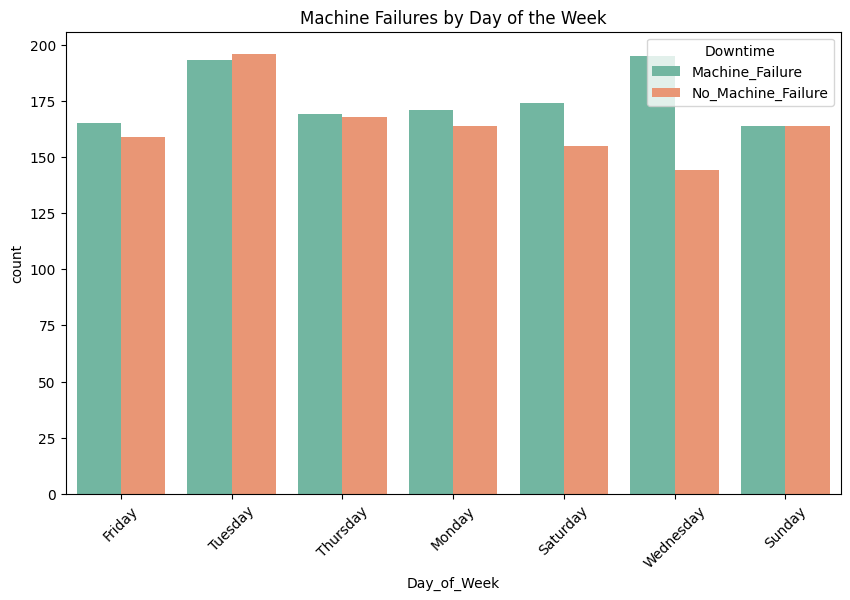

In [46]:
downtime['Day_of_Week'] = downtime['Date'].dt.day_name()

# Create the countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=downtime, x='Day_of_Week', hue='Downtime', palette='Set2')
plt.title('Machine Failures by Day of the Week')
plt.xticks(rotation=45)  
plt.show()


- > No clear pattern ✍

For Failures by Week (Grouped by Week of the Year):



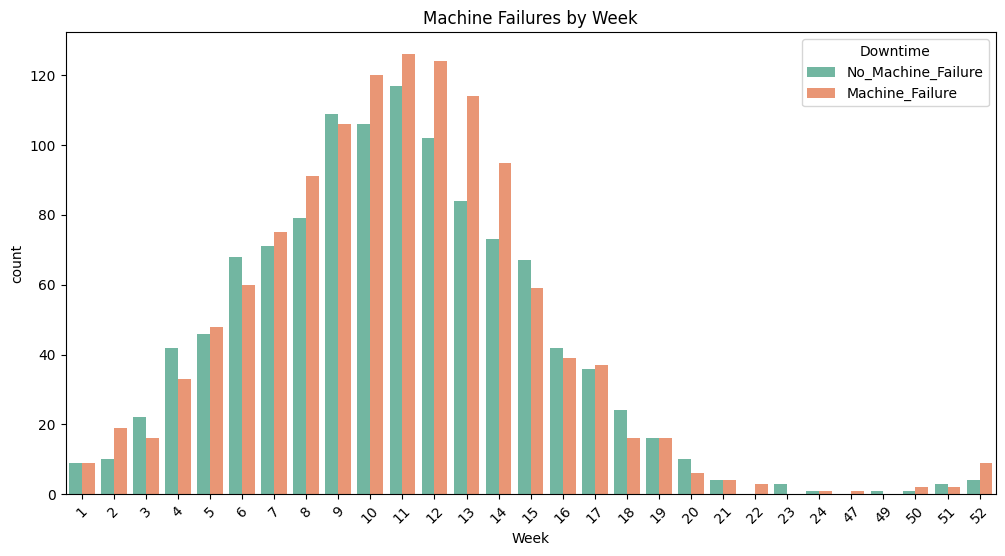

In [47]:
downtime['Week'] = downtime['Date'].dt.isocalendar().week

# Create the countplot for weeks
plt.figure(figsize=(12, 6))
sns.countplot(data=downtime, x='Week', hue='Downtime', palette='Set2')
plt.title('Machine Failures by Week')
plt.xticks(rotation=45)  
plt.show()


- > No clear pattern ✍

For Failures by Month (with months in order from January to December):


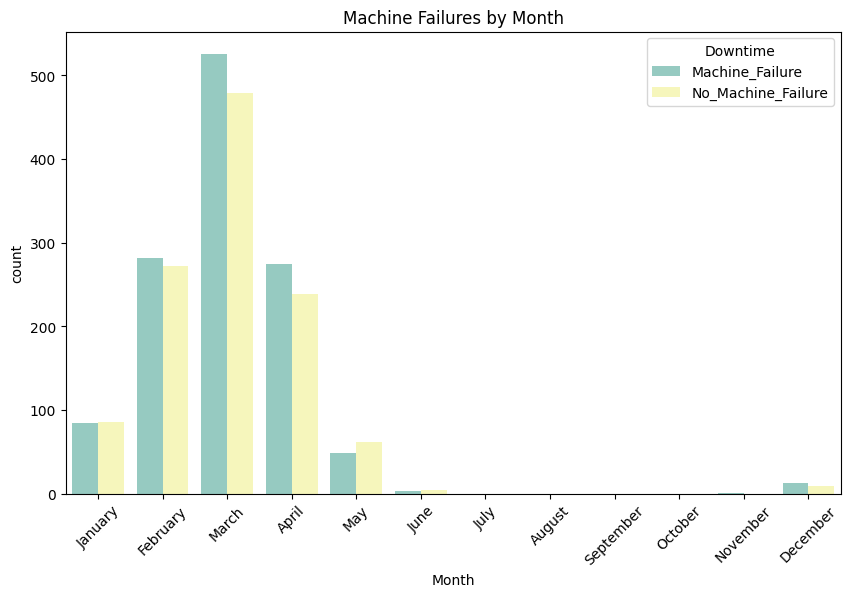

In [48]:
# Extract the month name from the Date column and convert it to a categorical variable with a specific order
downtime['Month'] = downtime['Date'].dt.month_name()

# Set the order of months from January to December
ordered_months = ['January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December']

# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=downtime, x='Month', hue='Downtime', palette='Set3', order=ordered_months)

# Set title and labels
plt.title('Machine Failures by Month')
plt.xticks(rotation=45)
plt.show()



- > Doesn't consider a pattern ✍

## 3. Which factors (visually) seem to be connected to machine downtime? ⭐ ⭐ ⭐

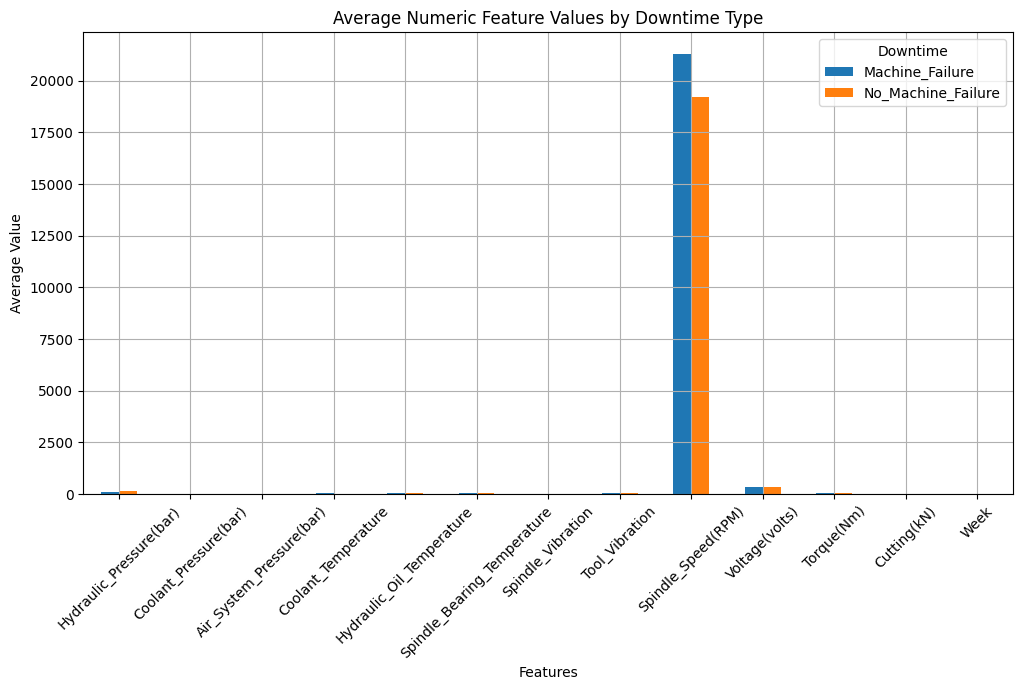

In [49]:
# Compute averages of numeric features by downtime type
numeric_columns = downtime.select_dtypes(include='number').columns
feature_summary = downtime.groupby('Downtime')[numeric_columns].mean()

# Visualize the differences
feature_summary.T.plot(kind='bar', figsize=(12, 6))
plt.title('Average Numeric Feature Values by Downtime Type')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Downtime')
plt.grid()
plt.show()


delete spindle_speed for more clarity

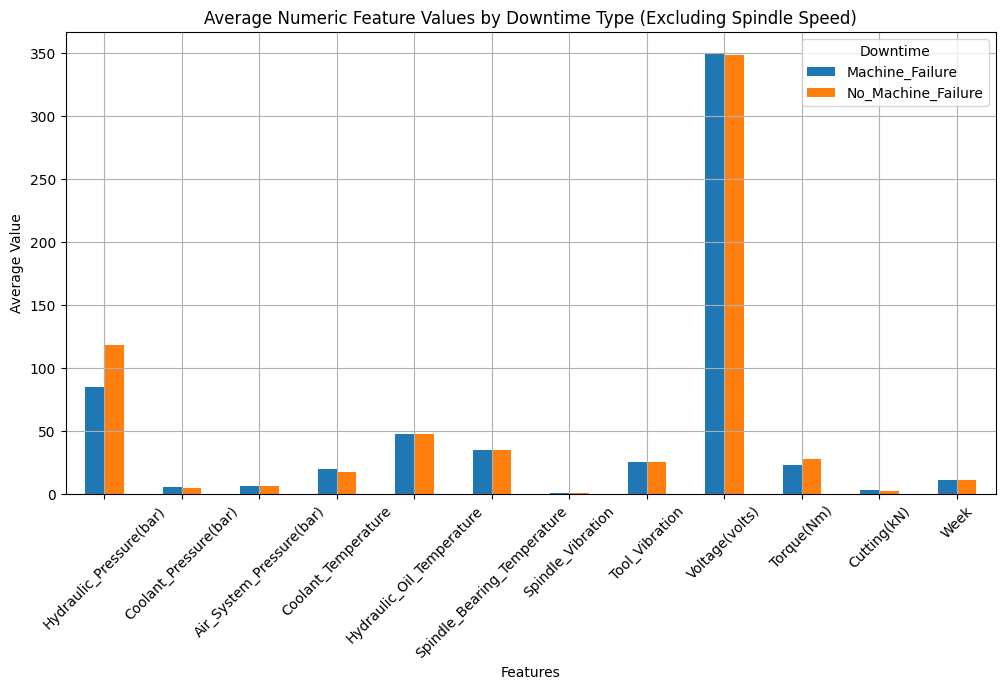

In [50]:
# Drop 'Spindle_Speed(RPM)' column from the dataset
downtime_without_spindle = downtime.drop(columns=['Spindle_Speed(RPM)'])

# Recompute numeric columns after dropping 'Spindle_Speed'
numeric_columns = downtime_without_spindle.select_dtypes(include='number').columns

# Compute averages of numeric features by downtime type
feature_summary = downtime_without_spindle.groupby('Downtime')[numeric_columns].mean()

# Visualize the differences
feature_summary.T.plot(kind='bar', figsize=(12, 6))
plt.title('Average Numeric Feature Values by Downtime Type (Excluding Spindle Speed)')
plt.xlabel('Features')
plt.ylabel('Average Value')
plt.xticks(rotation=45)
plt.legend(title='Downtime')
plt.grid()
plt.show()


- >Due to visualizations it seems that failure machines tend to have more spindle speed and less hydraulic pressure in average ✍

does kind of a machine tend to fail more than others ? (NO) ✍

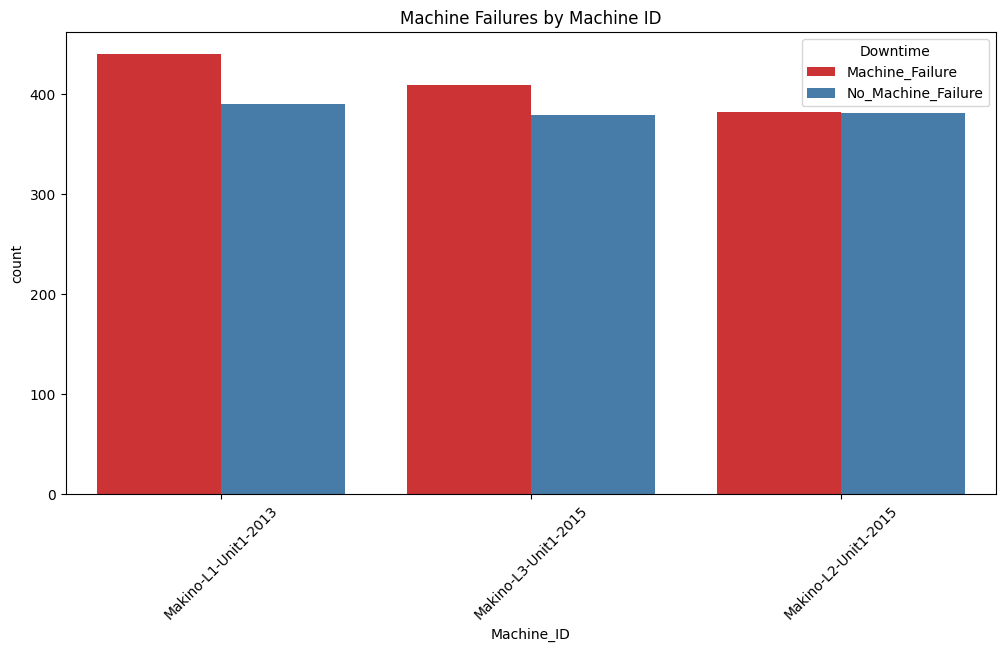

In [51]:
plt.figure(figsize=(12, 6))
sns.countplot(data=downtime, x='Machine_ID', hue='Downtime', palette='Set1')
plt.title('Machine Failures by Machine ID')
plt.xticks(rotation=45)
plt.show()


Corr between downtime and features

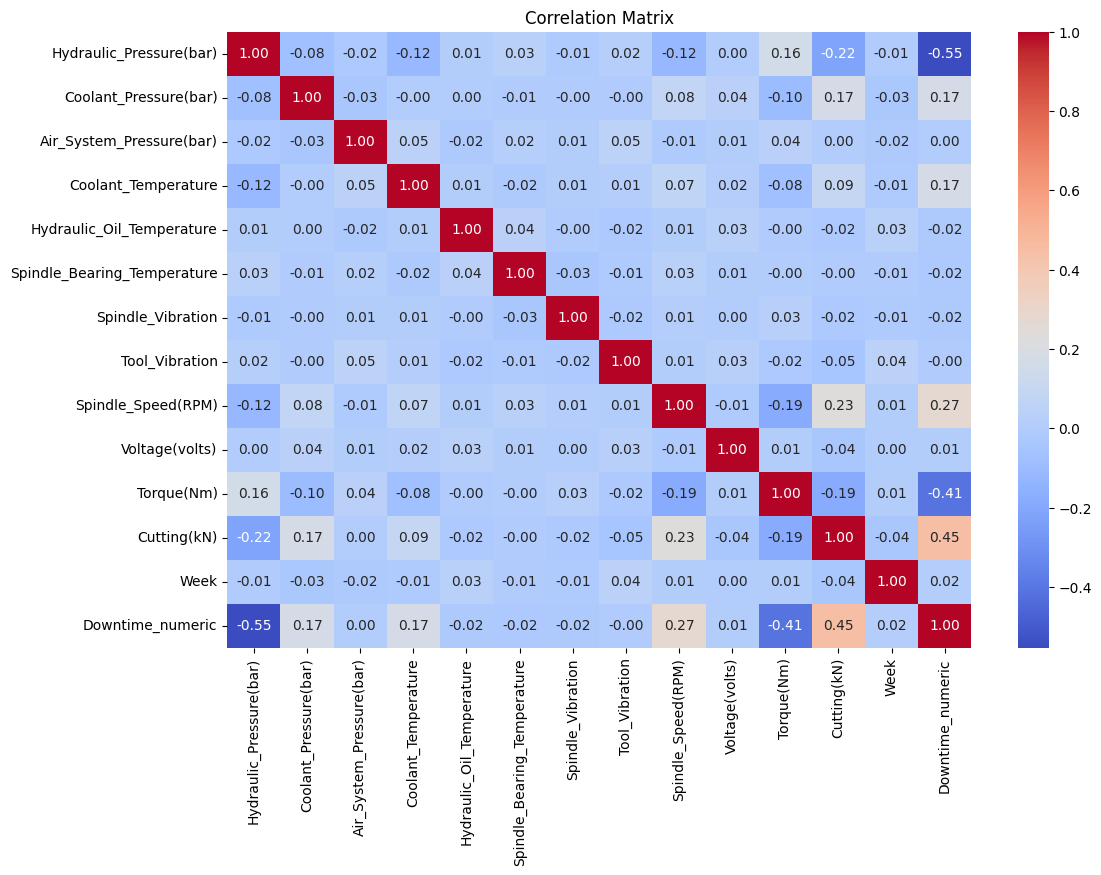

In [52]:
# Convert Downtime to numeric (Machine_Failure = 1, No_Failure = 0)
downtime['Downtime_numeric'] = downtime['Downtime'].apply(lambda x: 1 if x == 'Machine_Failure' else 0)

# Select only numeric columns for correlation calculation
numeric_columns = downtime.select_dtypes(include='number').columns

# Compute correlation matrix on numeric columns
correlation_matrix = downtime[numeric_columns].corr()

# Plot heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()


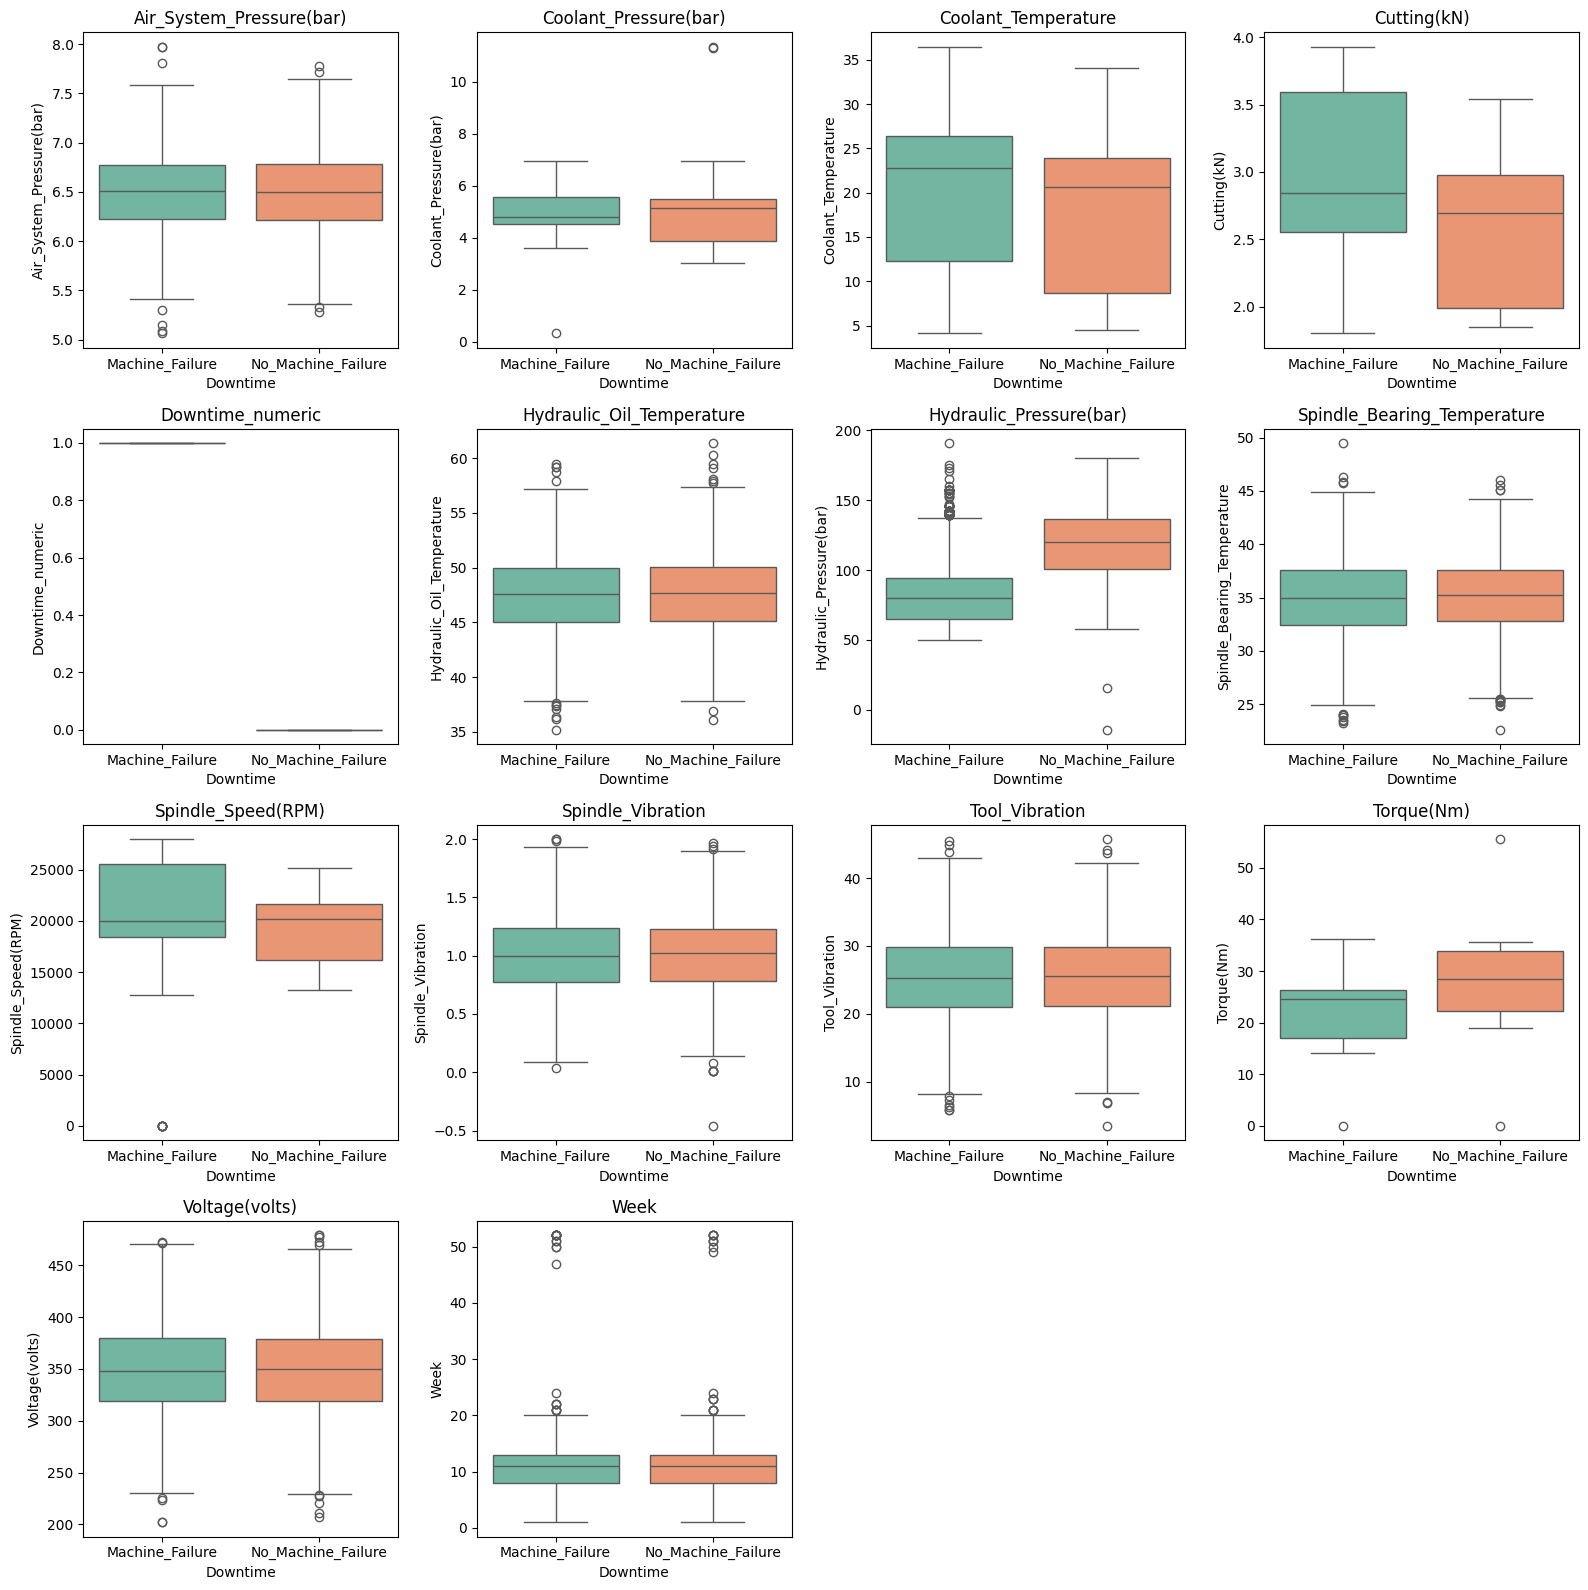

In [53]:
# Exclude 'Downtime' from the numeric columns
numeric_columns = downtime.select_dtypes(include='number').columns.difference(['Downtime'])

plt.figure(figsize=(16, 16)) 

# Loop through all numeric columns and create a boxplot for each
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i)  
    sns.boxplot(data=downtime, x='Downtime', y=col, hue='Downtime', palette='Set2', legend=False)
    plt.title(f'{col}')
    plt.xlabel('Downtime')
    plt.ylabel(col)

plt.tight_layout()  # Ensure the plots do not overlap
plt.show()


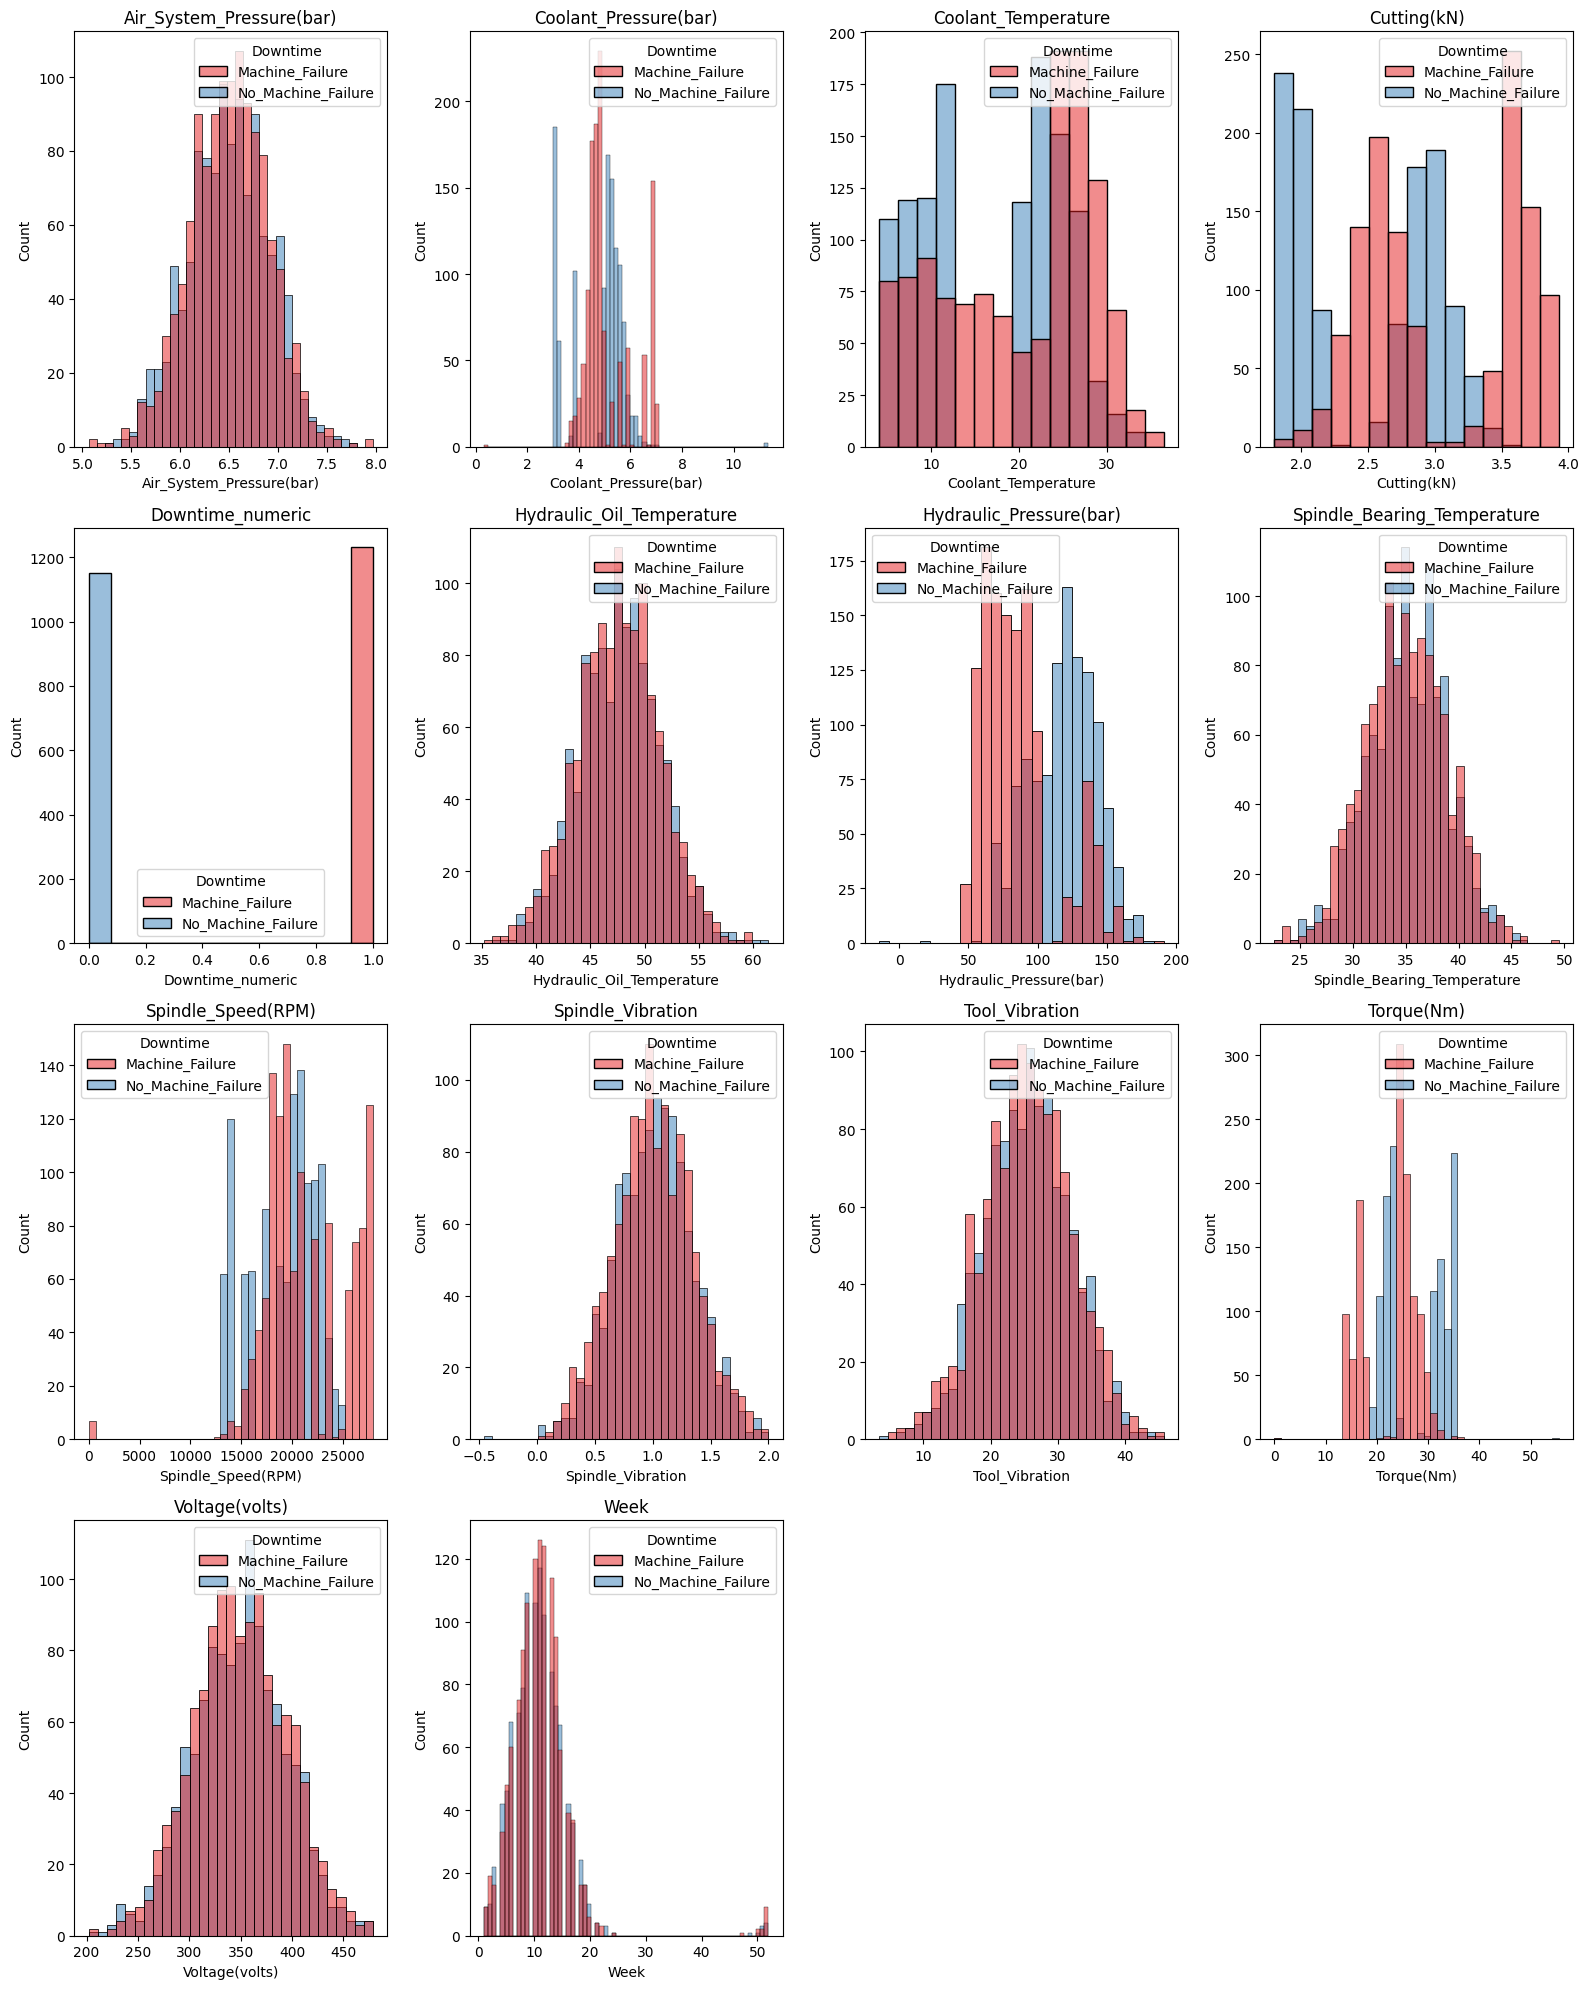

In [54]:
# Exclude 'Downtime' from the numeric columns
numeric_columns = downtime.select_dtypes(include='number').columns.difference(['Downtime'])

plt.figure(figsize=(16, 20))  

for i, col in enumerate(numeric_columns, 1):
    plt.subplot(4, 4, i) 
    sns.histplot(data=downtime, x=col, hue='Downtime', palette='Set1')
    plt.title(f'{col}')
    plt.xlabel(col)

plt.tight_layout()  
plt.show()


# Final recommendations

Due to last 2 plots i recommend that these values shouldn't be reached :

. Coolant_Pressure(bar) : 4 to 5 and above 7

. Coolant_Temperature : 11 to 19 and above 30

. Cutting(kN) : 2.25 to 2.5 and above 3.5

. Hydraulic_Pressure(bar) : below 90 

. Spindle Speed(RPM) : above 25k

. Torque(Nm) : 25 to 30 and below 18

